## Libraries import

In [2]:
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

#per poter gestire file csv
import pandas as pd

download dataset from  kaggle: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [3]:
!kaggle datasets download uom190346a/sleep-health-and-lifestyle-dataset

Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
License(s): CC0-1.0




  0%|          | 0.00/2.54k [00:00<?, ?B/s]
100%|██████████| 2.54k/2.54k [00:00<00:00, 2.39MB/s]


SPIEGARE COME è FATTO IL DATASET

### Extract and unzip dataset

In [3]:
zip_path = r"C:\Users\Greta\AppData\Local\Programs\Microsoft VS Code\sleep-health-and-lifestyle-dataset.zip"
final_path = r"C:\Users\Greta\Desktop\Sleep_Data" 

# Crea la directory di destinazione se non esiste
os.makedirs(final_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(final_path)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Giacomo\\Desktop\\MagistraleDocumenti\\AAA - Data Visualization\\Python projects\\PROJECT GIT\\DataVisualization'

In [3]:
#LO USA GRETA
dataset = r"C:\Users\Greta\Desktop\Sleep_Data\Sleep_health_and_lifestyle_dataset.csv" 

# Carica i dati in un DataFrame
df = pd.read_csv(dataset)

In [8]:
#LO USA GIACOMO
dataset = r"C:\Users\Giacomo\Desktop\MagistraleDocumenti\AAA - Data Visualization\Python projects\PROJECT GIT\Sleep_Data\Sleep_health_and_lifestyle_dataset.csv"

# Carica i dati in un DataFrame
df = pd.read_csv(dataset)

# Data visualization:

In [9]:
print(df.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')


### 
come cambia la qualità del sonno in base all'eta? MANCA Is there a difference in how sleep quality varies with age between men and women?"
MANCA quale fascia d'età ha il sonno migliore e peggiore?  Are the worst sleep qualities associated with obesity or underweight individuals in certain age groups
il lavoro che fai influisce in qualche modo sullo sleep disorder? Are men or women in certain occupations more likely to have sleep disorders?"

## come cambia la qualità del sonno in base all'eta?

In [11]:
# creo la colonna dei raggruppamenti per età
df['Age Group'] = pd.cut(df['Age'], bins=[25, 30, 35 ,40, 45,50, 55 ], 
                          labels=['25-29', '30-35', '36-40', '41-45', '45-50', '51-55'])

# calcolo la media della qualità del sonno per ciascun gruppo di età
age_group_quality = df.groupby('Age Group')['Quality of Sleep'].mean().reset_index()


print(age_group_quality)


  Age Group  Quality of Sleep
0     25-29          6.156250
1     30-35          6.677419
2     36-40          7.845070
3     41-45          6.979798
4     45-50          6.323529
5     51-55          8.465116


C:\Users\Giacomo\AppData\Local\Temp\ipykernel_13304\1424322609.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_quality = df.groupby('Age Group')['Quality of Sleep'].mean().reset_index()


##IO QUI FAREi NON UN LINEPLoT MA UN ISTOGRAMMA, PERCHE STIAMO LAVORANDO CON 5 FASCE DI ETA E NON DATI CONTINUI

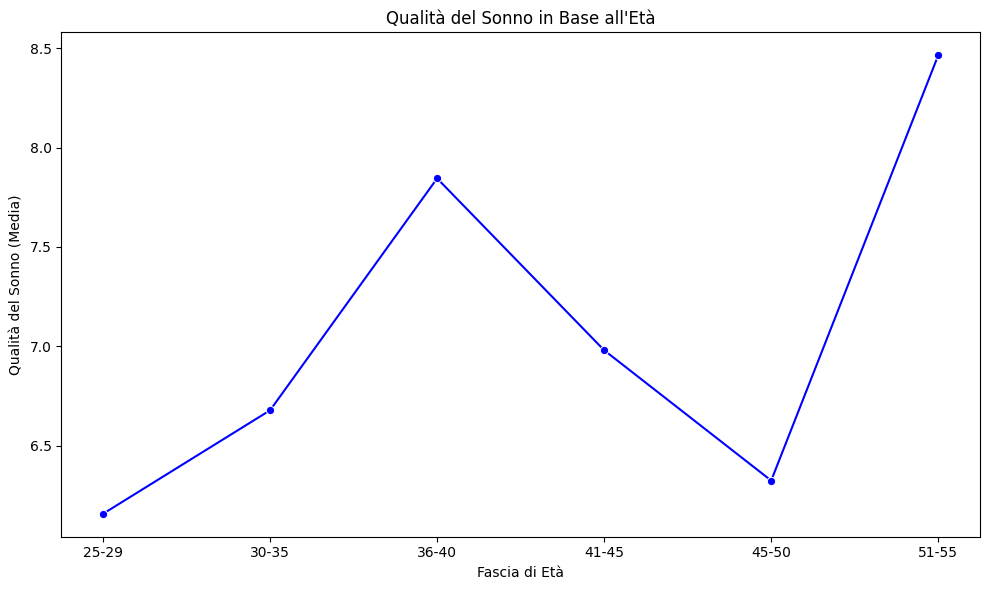

In [12]:
# Crea il grafico a linea per mostrare la tendenza della qualità del sonno in base all'età
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_group_quality, x='Age Group', y='Quality of Sleep', marker='o', color='b')

# Titoli e etichette
plt.title('Qualità del Sonno in Base all\'Età')
plt.xlabel('Fascia di Età')
plt.ylabel('Qualità del Sonno (Media)')
plt.tight_layout()
plt.show()


## il lavoro che fai influisce in qualche modo sullo sleep disorder? 

### Calcolo la percentuale di persone con disturbi del sonno per ogni professione

In [13]:
#ottengo le colonne che hanno dei sleep disorders 
sleep_disorders = df[~df['Sleep Disorder'].isna()]

#conto quante persone hanno disturbi del sonno per ogni professione
disorders_per_profession = sleep_disorders['Occupation'].value_counts()

#faccio il count per ogni professione
total_per_profession = df['Occupation'].value_counts()

#calcolo la proporzione
proportion = (disorders_per_profession / total_per_profession) * 100

In [14]:
print(proportion) #series

Occupation
Accountant               18.918919
Doctor                    9.859155
Engineer                  9.523810
Lawyer                   10.638298
Manager                        NaN
Nurse                    87.671233
Sales Representative    100.000000
Salesperson              93.750000
Scientist                50.000000
Software Engineer        25.000000
Teacher                  77.500000
Name: count, dtype: float64


In [15]:
print(type(proportion))

<class 'pandas.core.series.Series'>


In [16]:

#trasformo la series in dataframe
proportion_df = proportion.reset_index()
print(proportion_df.head)


#metto in ordine descrescente 
proportion_df = proportion_df.sort_values(by='count', ascending=False)


<bound method NDFrame.head of               Occupation       count
0             Accountant   18.918919
1                 Doctor    9.859155
2               Engineer    9.523810
3                 Lawyer   10.638298
4                Manager         NaN
5                  Nurse   87.671233
6   Sales Representative  100.000000
7            Salesperson   93.750000
8              Scientist   50.000000
9      Software Engineer   25.000000
10               Teacher   77.500000>


<>:5: SyntaxWarning: invalid escape sequence '\%'
<>:5: SyntaxWarning: invalid escape sequence '\%'
C:\Users\Giacomo\AppData\Local\Temp\ipykernel_13304\3072135602.py:5: SyntaxWarning: invalid escape sequence '\%'
  plt.xlabel('\%\ of sleep disorder')
C:\Users\Giacomo\AppData\Local\Temp\ipykernel_13304\3072135602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=proportion_df, x='count', y='Occupation', palette='viridis')


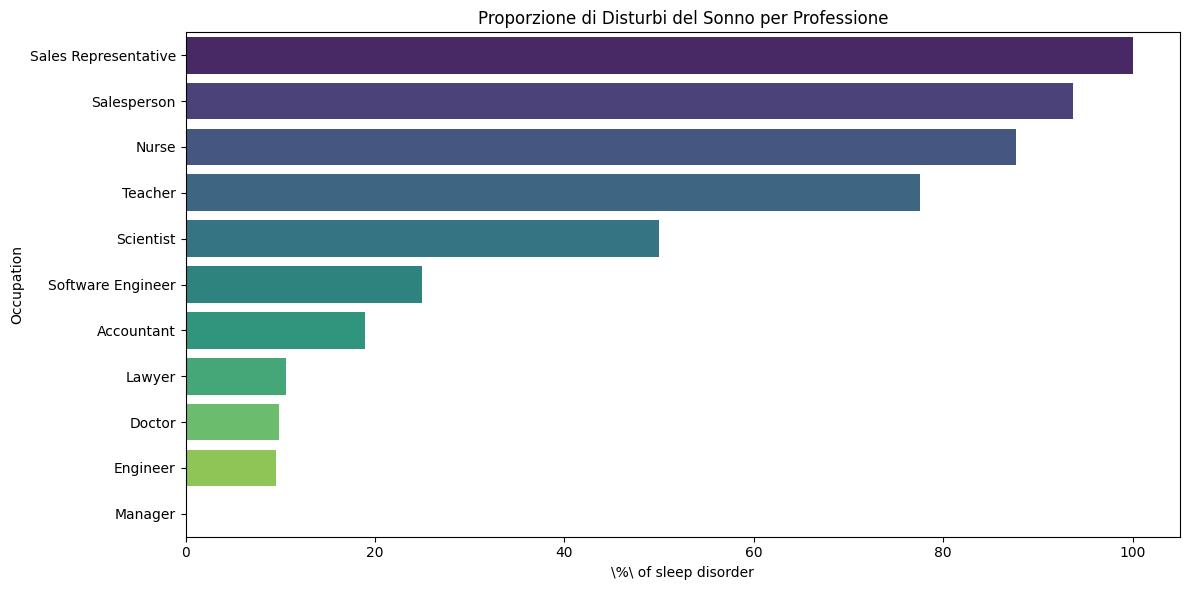

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=proportion_df, x='count', y='Occupation', palette='viridis')
plt.title('Proporzione di Disturbi del Sonno per Professione')
plt.ylabel('Occupation')
plt.xlabel('\%\ of sleep disorder')
plt.tight_layout()
plt.show()

## Quale gender tende A SOFFRIRE DI PIU DI DISTRURBI DEL SONNO RISPETTO AI LAVORI SVOLTI?

In [21]:
sleep_disorders = df[~df['Sleep Disorder'].isna()]

#conto il numero di male/female per ogni lavoro svolto
sleepDisorder_lavoro_gender = sleep_disorders.groupby(['Occupation', 'Gender']).size()

# Conta il numero totale per ciascun genere+lavoro
totale = df.groupby(['Occupation', 'Gender']).size()

proporzione_lavoro_gender = (sleepDisorder_lavoro_gender / totale) * 100

In [22]:
#converto in datatframe
proporzione_df = proporzione_lavoro_gender.reset_index()
#rinomino le colonne
proporzione_df.columns = ['Occupation', 'Gender', 'Sleep Disorder Proportion (%)']

# Ordino decrescente
proporzione_df = proporzione_df.sort_values(by='Sleep Disorder Proportion (%)', ascending=False)

print(proporzione_df)


              Occupation  Gender  Sleep Disorder Proportion (%)
10  Sales Representative    Male                     100.000000
11           Salesperson    Male                      93.750000
9                  Nurse  Female                      87.671233
14               Teacher  Female                      80.000000
15               Teacher    Male                      60.000000
6                 Lawyer  Female                      50.000000
12             Scientist  Female                      50.000000
13     Software Engineer    Male                      25.000000
0             Accountant  Female                      19.444444
5               Engineer    Male                      16.129032
3                 Doctor    Male                      10.144928
7                 Lawyer    Male                       8.888889
4               Engineer  Female                       3.125000
1             Accountant    Male                            NaN
2                 Doctor  Female        

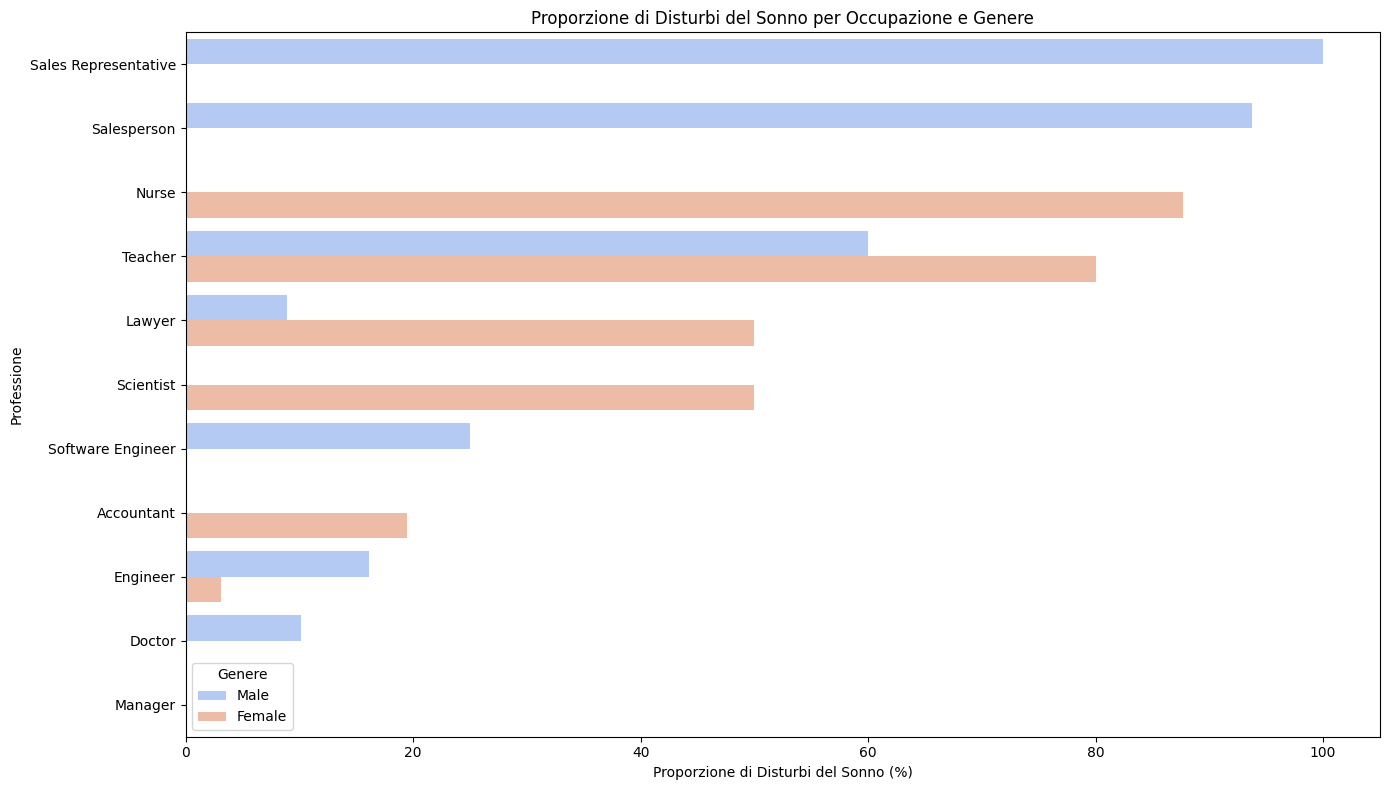

In [24]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=proporzione_df, 
    y='Occupation', 
    x='Sleep Disorder Proportion (%)', 
    hue='Gender', 
    palette='coolwarm'
)
plt.title('Proporzione di Disturbi del Sonno per Occupazione e Genere')
plt.ylabel('Professione')
plt.xlabel('Proporzione di Disturbi del Sonno (%)')
plt.legend(title='Genere')
plt.tight_layout()
plt.show()
